In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits


In [10]:
digits = load_digits()
X, y = digits.data, digits.target

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [11]:
# X_norm=(X-X.mean())/X.std()

X_norm=(X-X.min())/(X.max()-X.min())

**Part 1**

Text(0.5, 1.0, 'Within Cluster Sum of Squares vs Number of Clusters')

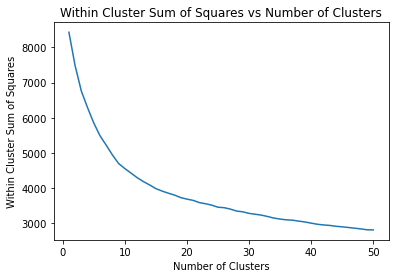

In [13]:
wcss = [] 
for number_of_clusters in range(1, 51): 
    kmeans = KMeans(n_clusters = number_of_clusters, random_state = 42)
    kmeans.fit(X_norm) 
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 51), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.title('Within Cluster Sum of Squares vs Number of Clusters')

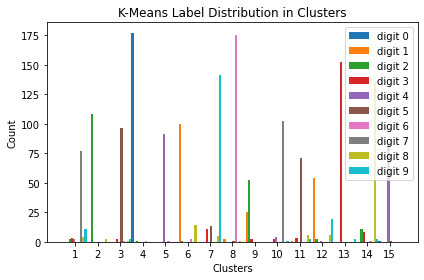

In [61]:
cluster = 15
kmeans = KMeans(n_clusters = cluster, random_state = 42)
kmeans.fit(X_norm) 
lab = kmeans.labels_

bar0 = [0]*cluster
bar1 = [0]*cluster
bar2 = [0]*cluster
bar3 = [0]*cluster
bar4 = [0]*cluster
bar5 = [0]*cluster
bar6 = [0]*cluster
bar7 = [0]*cluster
bar8 = [0]*cluster
bar9 = [0]*cluster

for i in range(len(lab)):
    if y[i] == 0:
        bar0[lab[i]] += 1
    elif y[i] == 1:
        bar1[lab[i]] += 1
    elif y[i] == 2:
        bar2[lab[i]] += 1
    elif y[i] == 3:
        bar3[lab[i]] += 1
    elif y[i] == 4:
        bar4[lab[i]] += 1
    elif y[i] == 5:
        bar5[lab[i]] += 1
    elif y[i] == 6:
        bar6[lab[i]] += 1
    elif y[i] == 7:
        bar7[lab[i]] += 1
    elif y[i] == 8:
        bar8[lab[i]] += 1
    elif y[i] == 9:
        bar9[lab[i]] += 1

# labels = ['1', '2', '3', '4', '5', '6']
# men_means = [20, 34, 30, 35, 27]
# women_means = [25, 32, 34, 20, 25]

x = np.arange(1, cluster+1)  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots()
rects0 = ax.bar(x - 9*width/2, bar0, width, label='digit 0')
rects1 = ax.bar(x - 7*width/2, bar1, width, label='digit 1')
rects2 = ax.bar(x - 5*width/2, bar2, width, label='digit 2')
rects3 = ax.bar(x - 3*width/2, bar3, width, label='digit 3')
rects4 = ax.bar(x - width/2, bar4, width, label='digit 4')
rects5 = ax.bar(x + width/2, bar5, width, label='digit 5')
rects6 = ax.bar(x + 3*width/2, bar6, width, label='digit 6')
rects7 = ax.bar(x + 5*width/2, bar7, width, label='digit 7')
rects8 = ax.bar(x + 7*width/2, bar8, width, label='digit 8')
rects9 = ax.bar(x + 9*width/2, bar9, width, label='digit 9')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_xlabel('Clusters')
ax.set_title('K-Means Label Distribution in Clusters')
ax.set_xticks(x)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

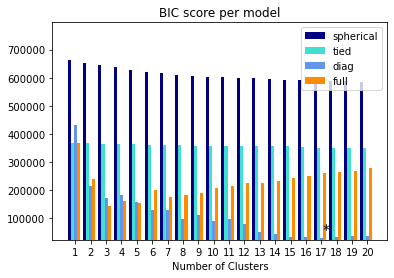

In [59]:
# General EM for GMM
from sklearn import preprocessing
import itertools

# transform data such that the distribution mean = 0 and std = 1
# scaler = preprocessing.StandardScaler()
# scaler.fit(X)
# scaled_X = scaler.transform(X)

# xs = pd.DataFrame(scaled_X, columns = X.columns)

from sklearn.mixture import GaussianMixture

lowest_bic = np.infty
bic = []
n_components_range = range(1, 21)
cv_types = ["spherical", "tied", "diag", "full"]
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(
            n_components=n_components, covariance_type=cv_type, random_state=0
        )
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(["navy", "turquoise", "cornflowerblue", "darkorange"])
clf_gmm = best_gmm
bars = []

# Plot the BIC scores
plt.figure()
spl = plt.subplot()
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + 0.2 * (i - 2)
    bars.append(
        plt.bar(
            xpos,
            bic[i * len(n_components_range) : (i + 1) * len(n_components_range)],
            width=0.2,
            color=color,
        )
    )
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - 0.01 * bic.max(), bic.max()*1.2])
plt.title("BIC score per model")
xpos = (
    np.mod(bic.argmin(), len(n_components_range))
    + 0.65
    + 0.2 * np.floor(bic.argmin() / len(n_components_range))
)
plt.text(xpos, bic.min() * 0.97 + 0.03 * bic.max(), "*", fontsize=14)
spl.set_xlabel("Number of Clusters")
spl.legend([b[0] for b in bars], cv_types)

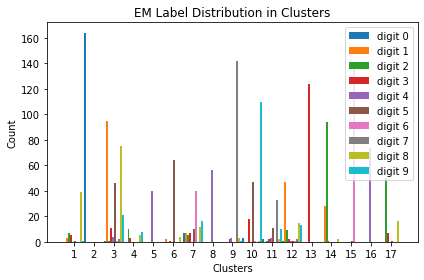

In [62]:
lab = clf_gmm.fit_predict(X)

cluster = 17

bar0 = [0]*cluster
bar1 = [0]*cluster
bar2 = [0]*cluster
bar3 = [0]*cluster
bar4 = [0]*cluster
bar5 = [0]*cluster
bar6 = [0]*cluster
bar7 = [0]*cluster
bar8 = [0]*cluster
bar9 = [0]*cluster

for i in range(len(lab)):
    if y[i] == 0:
        bar0[lab[i]] += 1
    elif y[i] == 1:
        bar1[lab[i]] += 1
    elif y[i] == 2:
        bar2[lab[i]] += 1
    elif y[i] == 3:
        bar3[lab[i]] += 1
    elif y[i] == 4:
        bar4[lab[i]] += 1
    elif y[i] == 5:
        bar5[lab[i]] += 1
    elif y[i] == 6:
        bar6[lab[i]] += 1
    elif y[i] == 7:
        bar7[lab[i]] += 1
    elif y[i] == 8:
        bar8[lab[i]] += 1
    elif y[i] == 9:
        bar9[lab[i]] += 1

# labels = ['1', '2', '3', '4', '5', '6']
# men_means = [20, 34, 30, 35, 27]
# women_means = [25, 32, 34, 20, 25]

x = np.arange(1, cluster+1)  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots()
rects0 = ax.bar(x - 9*width/2, bar0, width, label='digit 0')
rects1 = ax.bar(x - 7*width/2, bar1, width, label='digit 1')
rects2 = ax.bar(x - 5*width/2, bar2, width, label='digit 2')
rects3 = ax.bar(x - 3*width/2, bar3, width, label='digit 3')
rects4 = ax.bar(x - width/2, bar4, width, label='digit 4')
rects5 = ax.bar(x + width/2, bar5, width, label='digit 5')
rects6 = ax.bar(x + 3*width/2, bar6, width, label='digit 6')
rects7 = ax.bar(x + 5*width/2, bar7, width, label='digit 7')
rects8 = ax.bar(x + 7*width/2, bar8, width, label='digit 8')
rects9 = ax.bar(x + 9*width/2, bar9, width, label='digit 9')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_xlabel('Clusters')
ax.set_title('EM Label Distribution in Clusters')
ax.set_xticks(x)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

**Dimension Reduction**

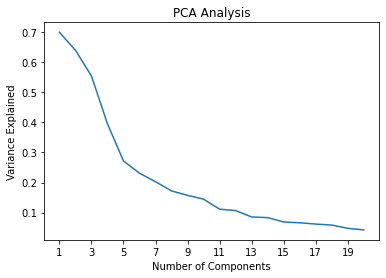

In [24]:
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.decomposition import TruncatedSVD

pca = PCA(n_components=20, random_state=0)
pca.fit(X_norm)
# variance = pca.explained_variance_ratio_ #calculate variance ratios
# var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var=np.cumsum(pca.explained_variance_)
# print(var) #cumulative sum of variance explained with [n] features
plt.ylabel('Variance Explained')
plt.xlabel('Number of Components')
plt.title('PCA Analysis')
# plt.ylim(0,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(range(1, 21), pca.explained_variance_)
plt.xticks(range(1, 21, 2))

pca = PCA(n_components=11, random_state=0)
X_pca = pca.fit_transform(X_norm)

/Users/bryanliu/miniconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/Users/bryanliu/miniconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/Users/bryanliu/miniconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


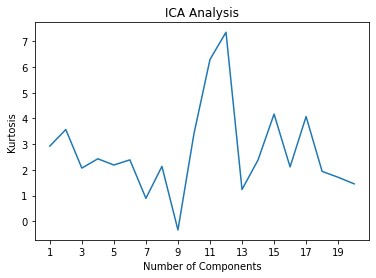

In [28]:
from scipy.stats import kurtosis

ica = FastICA(n_components=20, random_state=10)
X_ica = ica.fit_transform(X_norm)

plt.plot(range(1, 21), kurtosis(X_ica))
plt.ylabel('Kurtosis')
plt.xlabel('Number of Components')
plt.xticks(range(1, 21, 2))
plt.title('ICA Analysis')

ica = FastICA(n_components=12, random_state=0)
X_ica = ica.fit_transform(X_norm)

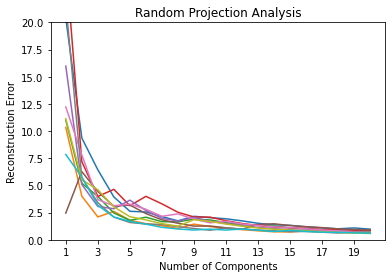

In [60]:
for s in range(10):
    error = []
    for i in range(1, 21):
        grp = GaussianRandomProjection(n_components=i, random_state=s, compute_inverse_components=True)
        X_grp = grp.fit_transform(X_norm)
        m = grp.inverse_components_
        inv = np.linalg.pinv(m)
        X_inv = np.matmul(X_grp, inv)
        mse = ((np.array(X_norm)-X_inv)**2).mean()
        error.append(mse)

    plt.plot(range(1, 21), error)
plt.ylabel('Reconstruction Error')
plt.xlabel('Number of Components')
plt.ylim(0,20)
plt.title('Random Projection Analysis')
plt.xticks(range(1, 21, 2))

grp = GaussianRandomProjection(n_components=8, random_state=0)
X_grp = grp.fit_transform(X_norm)

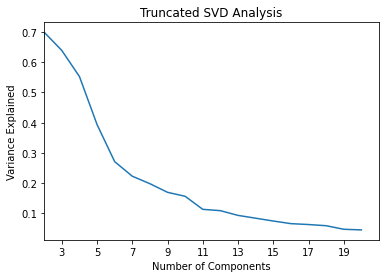

In [35]:
svd = TruncatedSVD(n_components=20, n_iter=7, random_state=0)
X_svd = svd.fit_transform(X_norm)
plt.ylabel('Variance Explained')
plt.xlabel('Number of Components')
# plt.yscale('log')
plt.title('Truncated SVD Analysis')
# plt.ylim(0,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(range(1, 21), svd.explained_variance_)
plt.xticks(range(1, 21, 2))
plt.xlim(2,21)
svd = TruncatedSVD(n_components=11, n_iter=7, random_state=0)
X_svd = svd.fit_transform(X_norm)

**Part 3 K Means**

Text(0.5, 1.0, 'Within Cluster Sum of Squares vs Number of Clusters')

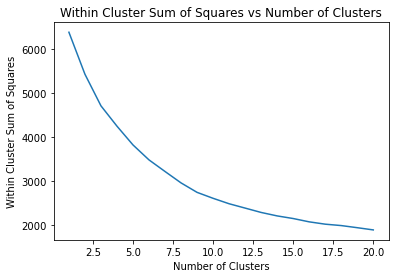

In [52]:
# X_p3 = X_pca
# X_p3 = X_ica
# X_p3 = X_grp
X_p3 = X_svd

wcss = [] 
for number_of_clusters in range(1, 21): 
    kmeans = KMeans(n_clusters = number_of_clusters, random_state = 42)
    kmeans.fit(X_p3) 
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 21), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.title('Within Cluster Sum of Squares vs Number of Clusters')

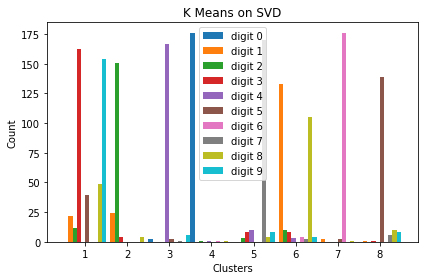

In [53]:
cluster = 8
kmeans = KMeans(n_clusters = cluster, random_state = 42)
kmeans.fit(X_p3) 
lab = kmeans.labels_

bar0 = [0]*cluster
bar1 = [0]*cluster
bar2 = [0]*cluster
bar3 = [0]*cluster
bar4 = [0]*cluster
bar5 = [0]*cluster
bar6 = [0]*cluster
bar7 = [0]*cluster
bar8 = [0]*cluster
bar9 = [0]*cluster

for i in range(len(lab)):
    if y[i] == 0:
        bar0[lab[i]] += 1
    elif y[i] == 1:
        bar1[lab[i]] += 1
    elif y[i] == 2:
        bar2[lab[i]] += 1
    elif y[i] == 3:
        bar3[lab[i]] += 1
    elif y[i] == 4:
        bar4[lab[i]] += 1
    elif y[i] == 5:
        bar5[lab[i]] += 1
    elif y[i] == 6:
        bar6[lab[i]] += 1
    elif y[i] == 7:
        bar7[lab[i]] += 1
    elif y[i] == 8:
        bar8[lab[i]] += 1
    elif y[i] == 9:
        bar9[lab[i]] += 1

# labels = ['1', '2', '3', '4', '5', '6']
# men_means = [20, 34, 30, 35, 27]
# women_means = [25, 32, 34, 20, 25]

x = np.arange(1, cluster+1)  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots()
rects0 = ax.bar(x - 9*width/2, bar0, width, label='digit 0')
rects1 = ax.bar(x - 7*width/2, bar1, width, label='digit 1')
rects2 = ax.bar(x - 5*width/2, bar2, width, label='digit 2')
rects3 = ax.bar(x - 3*width/2, bar3, width, label='digit 3')
rects4 = ax.bar(x - width/2, bar4, width, label='digit 4')
rects5 = ax.bar(x + width/2, bar5, width, label='digit 5')
rects6 = ax.bar(x + 3*width/2, bar6, width, label='digit 6')
rects7 = ax.bar(x + 5*width/2, bar7, width, label='digit 7')
rects8 = ax.bar(x + 7*width/2, bar8, width, label='digit 8')
rects9 = ax.bar(x + 9*width/2, bar9, width, label='digit 9')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_xlabel('Clusters')
ax.set_title('K Means on SVD')
ax.set_xticks(x)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

**Part 3 EM**

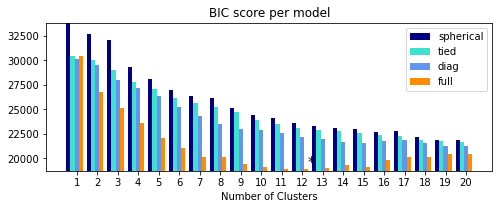

In [54]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 21)
cv_types = ["spherical", "tied", "diag", "full"]
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(
            n_components=n_components, covariance_type=cv_type, random_state=0
        )
        gmm.fit(X_p3)
        bic.append(gmm.bic(X_p3))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(["navy", "turquoise", "cornflowerblue", "darkorange"])
clf_gmm = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + 0.2 * (i - 2)
    bars.append(
        plt.bar(
            xpos,
            bic[i * len(n_components_range) : (i + 1) * len(n_components_range)],
            width=0.2,
            color=color,
        )
    )
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - 0.01 * bic.max(), bic.max()])
plt.title("BIC score per model")
xpos = (
    np.mod(bic.argmin(), len(n_components_range))
    + 0.65
    + 0.2 * np.floor(bic.argmin() / len(n_components_range))
)
plt.text(xpos, bic.min() * 0.97 + 0.03 * bic.max(), "*", fontsize=14)
spl.set_xlabel("Number of Clusters")
spl.legend([b[0] for b in bars], cv_types)

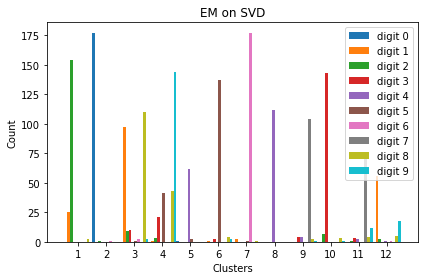

In [55]:
lab = clf_gmm.fit_predict(X)
cluster = 12

bar0 = [0]*cluster
bar1 = [0]*cluster
bar2 = [0]*cluster
bar3 = [0]*cluster
bar4 = [0]*cluster
bar5 = [0]*cluster
bar6 = [0]*cluster
bar7 = [0]*cluster
bar8 = [0]*cluster
bar9 = [0]*cluster

for i in range(len(lab)):
    if y[i] == 0:
        bar0[lab[i]] += 1
    elif y[i] == 1:
        bar1[lab[i]] += 1
    elif y[i] == 2:
        bar2[lab[i]] += 1
    elif y[i] == 3:
        bar3[lab[i]] += 1
    elif y[i] == 4:
        bar4[lab[i]] += 1
    elif y[i] == 5:
        bar5[lab[i]] += 1
    elif y[i] == 6:
        bar6[lab[i]] += 1
    elif y[i] == 7:
        bar7[lab[i]] += 1
    elif y[i] == 8:
        bar8[lab[i]] += 1
    elif y[i] == 9:
        bar9[lab[i]] += 1

# labels = ['1', '2', '3', '4', '5', '6']
# men_means = [20, 34, 30, 35, 27]
# women_means = [25, 32, 34, 20, 25]

x = np.arange(1, cluster+1)  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots()
rects0 = ax.bar(x - 9*width/2, bar0, width, label='digit 0')
rects1 = ax.bar(x - 7*width/2, bar1, width, label='digit 1')
rects2 = ax.bar(x - 5*width/2, bar2, width, label='digit 2')
rects3 = ax.bar(x - 3*width/2, bar3, width, label='digit 3')
rects4 = ax.bar(x - width/2, bar4, width, label='digit 4')
rects5 = ax.bar(x + width/2, bar5, width, label='digit 5')
rects6 = ax.bar(x + 3*width/2, bar6, width, label='digit 6')
rects7 = ax.bar(x + 5*width/2, bar7, width, label='digit 7')
rects8 = ax.bar(x + 7*width/2, bar8, width, label='digit 8')
rects9 = ax.bar(x + 9*width/2, bar9, width, label='digit 9')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_xlabel('Clusters')
ax.set_title('EM on SVD')
ax.set_xticks(x)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

**Part 4**

0.8405797101449275
0.8333333333333334
0.8405797101449275
0.8043478260869565
0.8260869565217391
0.16306042671203613 0.3409607410430908 0.17002320289611816 0.3021368980407715 0.3029060363769531


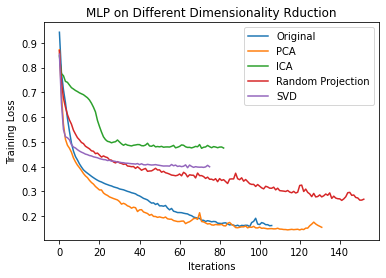

In [73]:
from sklearn.neural_network import MLPClassifier
from time import time

t0 = time()
X_train, X_test, y_train, y_test = train_test_split(X_norm, y,test_size=0.20,random_state=2)
mlp_clf0 = MLPClassifier(hidden_layer_sizes=(20,25, 10),  max_iter=550, solver='adam', activation='relu', alpha=0.7, 
                 learning_rate_init=0.01, learning_rate='adaptive',  verbose=False, momentum=0.1, random_state=0)
mlp_clf0.fit(X_train, y_train)
print(mlp_clf0.score(X_test, y_test))

t1 = time()
X_train, X_test, y_train, y_test = train_test_split(X_pca, y,test_size=0.20,random_state=2)
mlp_clf1 = MLPClassifier(hidden_layer_sizes=(20,30, 20),  max_iter=550, solver='adam', activation='relu', alpha=0.7, 
                 learning_rate_init=0.01, learning_rate='adaptive',  verbose=False, momentum=0.1, random_state=0)
mlp_clf1.fit(X_train, y_train)
print(mlp_clf1.score(X_test, y_test))

t2 = time()
X_train, X_test, y_train, y_test = train_test_split(X_ica, y,test_size=0.20,random_state=2)
mlp_clf2 = MLPClassifier(hidden_layer_sizes=(20,30, 20),  max_iter=550, solver='adam', activation='relu', alpha=0.7, 
                 learning_rate_init=0.01, learning_rate='adaptive',  verbose=False, momentum=0.1, random_state=0)
mlp_clf2.fit(X_train, y_train)
print(mlp_clf2.score(X_test, y_test))

t3 = time()
X_train, X_test, y_train, y_test = train_test_split(X_grp, y,test_size=0.20,random_state=2)
mlp_clf3 = MLPClassifier(hidden_layer_sizes=(20,30, 20),  max_iter=550, solver='adam', activation='relu', alpha=0.7, 
                 learning_rate_init=0.01, learning_rate='adaptive',  verbose=False, momentum=0.1, random_state=0)
mlp_clf3.fit(X_train, y_train)
print(mlp_clf3.score(X_test, y_test))

t4 = time()
X_train, X_test, y_train, y_test = train_test_split(X_svd, y,test_size=0.20,random_state=2)
mlp_clf4 = MLPClassifier(hidden_layer_sizes=(20,30, 20),  max_iter=550, solver='adam', activation='relu', alpha=0.7, 
                 learning_rate_init=0.01, learning_rate='adaptive',  verbose=False, momentum=0.1, random_state=0)
mlp_clf4.fit(X_train, y_train)
print(mlp_clf4.score(X_test, y_test))

t5 = time()
print(t5-t4, t4-t3, t3-t2, t2-t1, t1-t0)

plt.plot(mlp_clf0.loss_curve_, label = f'Original')
plt.plot(mlp_clf1.loss_curve_, label = f'PCA')
plt.plot(mlp_clf2.loss_curve_, label = f'ICA')
plt.plot(mlp_clf3.loss_curve_, label = f'Random Projection')
plt.plot(mlp_clf4.loss_curve_, label = f'SVD')
plt.xlabel('Iterations')
plt.ylabel("Training Loss")
plt.title("MLP on Different Dimensionality Rduction")
plt.legend()

**Part 5**

0.8405797101449275


/Users/bryanliu/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/bryanliu/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/bryanliu/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.8478260869565217


/Users/bryanliu/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/bryanliu/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.8043478260869565


/Users/bryanliu/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/bryanliu/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.7898550724637681
0.8115942028985508
0.342897891998291 0.37228894233703613 0.269258975982666 0.22788500785827637 0.2674410343170166


/Users/bryanliu/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


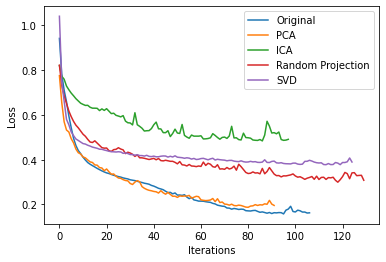

In [87]:
#pca 
kmeans = KMeans(n_clusters = 6, random_state = 42)
kmeans.fit(X_pca) 
pca_label1 = kmeans.labels_

gmm = GaussianMixture(n_components=10, covariance_type='full', random_state=0)
pca_label2 = gmm.fit_predict(X_pca)
X_pca_cls = pd.DataFrame(X_pca)
X_pca_cls['kmeans'] = pca_label1
X_pca_cls['gmm'] = pca_label2

#ica
kmeans = KMeans(n_clusters = 6, random_state = 42)
kmeans.fit(X_ica) 
ica_label1 = kmeans.labels_

gmm = GaussianMixture(n_components=10, covariance_type='full', random_state=0)
ica_label2 = gmm.fit_predict(X_ica)
X_ica_cls = pd.DataFrame(X_ica)
X_ica_cls['kmeans'] = ica_label1
X_ica_cls['gmm'] = ica_label2

#grp
kmeans = KMeans(n_clusters = 6, random_state = 42)
kmeans.fit(X_grp) 
grp_label1 = kmeans.labels_

gmm = GaussianMixture(n_components=10, covariance_type='tied', random_state=0)
grp_label2 = gmm.fit_predict(X_grp)
X_grp_cls = pd.DataFrame(X_grp)
X_grp_cls['kmeans'] = grp_label1
X_grp_cls['gmm'] = grp_label2

#svd
kmeans = KMeans(n_clusters = 5, random_state = 42)
kmeans.fit(X_svd) 
svd_label1 = kmeans.labels_

gmm = GaussianMixture(n_components=9, covariance_type='full', random_state=0)
svd_label2 = gmm.fit_predict(X_svd)
X_svd_cls = pd.DataFrame(X_svd)
X_svd_cls['kmeans'] = svd_label1
X_svd_cls['gmm'] = svd_label2


t0 = time()
X_train, X_test, y_train, y_test = train_test_split(X_norm, y,test_size=0.20,random_state=2)
mlp_clf0 = MLPClassifier(hidden_layer_sizes=(20,25, 10),  max_iter=550, solver='adam', activation='relu', alpha=0.7, 
                 learning_rate_init=0.01, learning_rate='adaptive',  verbose=False, momentum=0.1, random_state=0)
mlp_clf0.fit(X_train, y_train)
print(mlp_clf0.score(X_test, y_test))

t1 = time()
X_train, X_test, y_train, y_test = train_test_split(X_pca_cls, y,test_size=0.20,random_state=2)
mlp_clf1 = MLPClassifier(hidden_layer_sizes=(20,30, 20),  max_iter=550, solver='adam', activation='relu', alpha=0.7, 
                 learning_rate_init=0.01, learning_rate='adaptive',  verbose=False, momentum=0.1, random_state=0)
mlp_clf1.fit(X_train, y_train)
print(mlp_clf1.score(X_test, y_test))

t2 = time()
X_train, X_test, y_train, y_test = train_test_split(X_ica_cls, y,test_size=0.20,random_state=2)
mlp_clf2 = MLPClassifier(hidden_layer_sizes=(30,30, 20),  max_iter=550, solver='adam', activation='relu', alpha=0.7, 
                 learning_rate_init=0.01, learning_rate='adaptive',  verbose=False, momentum=0.1, random_state=0)
mlp_clf2.fit(X_train, y_train)
print(mlp_clf2.score(X_test, y_test))

t3 = time()
X_train, X_test, y_train, y_test = train_test_split(X_grp_cls, y,test_size=0.20,random_state=2)
mlp_clf3 = MLPClassifier(hidden_layer_sizes=(20,30, 20),  max_iter=550, solver='adam', activation='relu', alpha=0.7, 
                 learning_rate_init=0.01, learning_rate='adaptive',  verbose=False, momentum=0.1, random_state=0)
mlp_clf3.fit(X_train, y_train)
print(mlp_clf3.score(X_test, y_test))

t4 = time()
X_train, X_test, y_train, y_test = train_test_split(X_svd_cls, y,test_size=0.20,random_state=2)
mlp_clf4 = MLPClassifier(hidden_layer_sizes=(20,20, 20),  max_iter=550, solver='adam', activation='relu', alpha=0.7, 
                 learning_rate_init=0.01, learning_rate='adaptive',  verbose=False, momentum=0.1, random_state=0)
mlp_clf4.fit(X_train, y_train)
print(mlp_clf4.score(X_test, y_test))

t5 = time()
print(t5-t4, t4-t3, t3-t2, t2-t1, t1-t0)

plt.plot(mlp_clf0.loss_curve_, label = f'Original')
plt.plot(mlp_clf1.loss_curve_, label = f'PCA')
plt.plot(mlp_clf2.loss_curve_, label = f'ICA')
plt.plot(mlp_clf3.loss_curve_, label = f'Random Projection')
plt.plot(mlp_clf4.loss_curve_, label = f'SVD')
plt.xlabel('Iterations')
plt.ylabel("Loss")
plt.legend()